# Preliminary

Help

In [63]:
# Documentation: https://ssc-datascience.github.io/
# https://medium.com/python-in-plain-english/scraping-tweets-with-tweepy-python-59413046e788
# https://towardsdatascience.com/how-to-scrape-tweets-from-twitter-59287e20f0f1

In [64]:
# Help: https://www.geeksforgeeks.org/twitter-sentiment-analysis-using-python/

#!pip install tweepy # python client for the official Twitter API
#!pip install textblob # python library for processing textual data

Needed to create a Twitter Developer account

Packages loading

In [65]:
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import tweepy
import json
import pandas as pd
import csv
import re
from textblob import TextBlob
import string
!pip install preprocessor
import preprocessor as p
import os
import time
import numpy as np
import nltk

In [66]:
def clean_tweet(tweet): 
        ''' 
        Utility function to clean tweet text by removing links, special characters using simple regex statements. 
        '''
        return ' '.join(re.sub("(\w+:\/\/\S+)", " ", tweet).split()) # (@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|

# Data

In [4]:
# Twitter credentials
# Obtain them from your twitter developer account

consumer_key = "llDUBhsrdWwjMifeQE9154ksL"
consumer_secret = "m9VzcU7C5C6ywr3FkzAZcxFMFP53ZqVWMVjvF3Ys4GaJbB3P4p"

access_token = "569647523-5m3bsv6Wh5CWJCKGZeOwJWWv79TzwscjLuKaTd8b"
access_token_secret = "xIhYCKy5iIMRucMi37DaRg1BAS2IIHUVqxutk5msEsRa5"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth,wait_on_rate_limit=True)

In [5]:
# Number of most recent tweets to be scraped

import datetime

count = 2000
startDate = datetime.datetime(2018, 1, 1, 0, 0, 0)
endDate = datetime.datetime(2020, 12, 31, 0, 0, 0)

In [6]:
username = 'Succes_MASRA'

try:     
 # Creation of query method using parameters
 tweets = tweepy.Cursor(api.user_timeline,id=username,tweet_mode='extended').items(count)
 
 # Pulling information from tweets iterable object
 tweets_list = [[tweet.created_at, tweet.id, clean_tweet(tweet.full_text)] for tweet in tweets]
 
 # Creation of dataframe from tweets list
 # Add or remove columns as you remove tweet information
 masra_tweets = pd.DataFrame(tweets_list)
 masra_tweets = masra_tweets[startDate < masra_tweets[0]]
 masra_tweets = masra_tweets[masra_tweets[0] < endDate]
 masra_tweets.columns = ['date','id','tweet']
except BaseException as e:
      # print error (if any) 
      print('failed on_status,',str(e))
      time.sleep(3)

In [7]:
username = 'saleh_kebzabo'

try:     
 # Creation of query method using parameters
 tweets = tweepy.Cursor(api.user_timeline,id=username,tweet_mode='extended').items(count)
 
 # Pulling information from tweets iterable object
 tweets_list = [[tweet.created_at, tweet.id, clean_tweet(tweet.full_text)] for tweet in tweets]
 
 # Creation of dataframe from tweets list
 # Add or remove columns as you remove tweet information
 kebzabo_tweets = pd.DataFrame(tweets_list)
 kebzabo_tweets = kebzabo_tweets[startDate < kebzabo_tweets[0]]
 kebzabo_tweets = kebzabo_tweets[kebzabo_tweets[0] < endDate]
 kebzabo_tweets.columns = ['date','id','tweet']
except BaseException as e:
      # print error (if any) 
      print('failed on_status,',str(e))
      time.sleep(3)

#Sentiment analysis

In [ ]:
!pip install textblob_fr
from textblob_fr import PatternTagger, PatternAnalyzer

Simple sentiment analysis

In [9]:
masra_sentiment = pd.DataFrame([TextBlob(text=masra_tweets['tweet'][i], pos_tagger=PatternTagger(), analyzer=PatternAnalyzer()).sentiment for i in range(len(masra_tweets))])
masra_sentiment.columns = ['polarity', 'subjectivity'] # polarity,subjectivity
masra_sentiment['date_truncated'] = [masra_tweets['date'][i].date() for i in range(len(masra_tweets))]

kebzabo_sentiment = pd.DataFrame([TextBlob(text=kebzabo_tweets['tweet'][i], pos_tagger=PatternTagger(), analyzer=PatternAnalyzer()).sentiment for i in range(len(kebzabo_tweets))])
kebzabo_sentiment.columns = ['polarity', 'subjectivity'] # polarity,subjectivity
kebzabo_sentiment['date_truncated'] = [kebzabo_tweets['date'][i].date() for i in range(len(kebzabo_tweets))]

In [10]:
mycolors = ['brown','turquoise','red','aqua','lightcoral','aquamarine']

Text(0, 0.5, 'Polarity score')

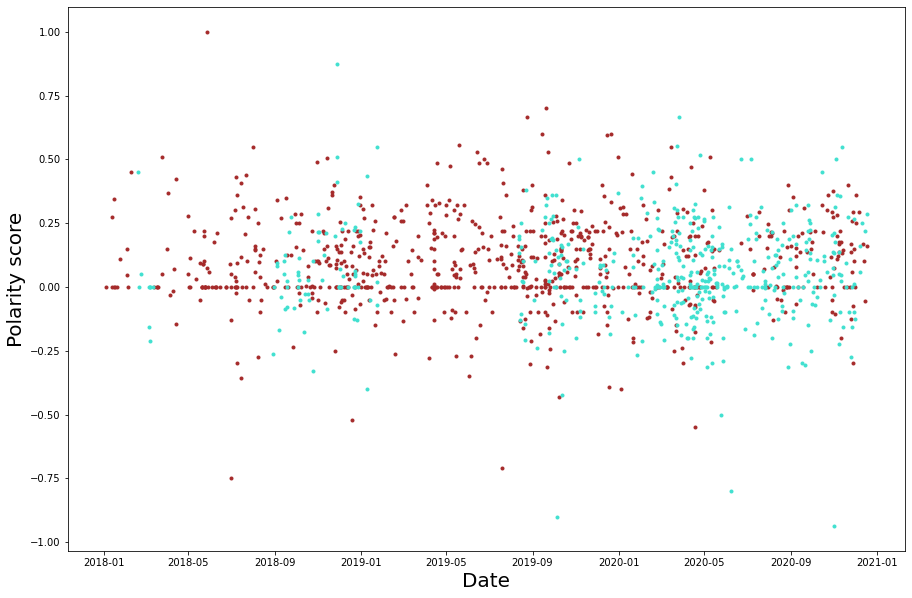

In [13]:
import matplotlib.pyplot as plt #for plotting

plt.figure(figsize=(15,10))
#plt.xlim(0,max(len(masra_tweets[0]),len(kebzabo_tweets[0])))

plt.plot(masra_sentiment['date_truncated'],masra_sentiment["polarity"],'.',color = mycolors[0],label='masra')
plt.plot(kebzabo_sentiment['date_truncated'],kebzabo_sentiment["polarity"],'.',color = mycolors[1],label='kebzabo')

#plt.stackplot(range(len(year)),participations, colors = mycolors, labels=name[african_participant])

#plt.yticks(np.arange(0,sum(np.max(participations,axis=1)),15),fontsize=15)
#plt.xticks(np.arange(1,len(year),3),year[np.arange(1,len(year),3)][::-1],fontsize=15)

#plt.legend(loc='upper left',fontsize=15)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Polarity score',fontsize=20)

Text(0, 0.5, 'Subjectivity score')

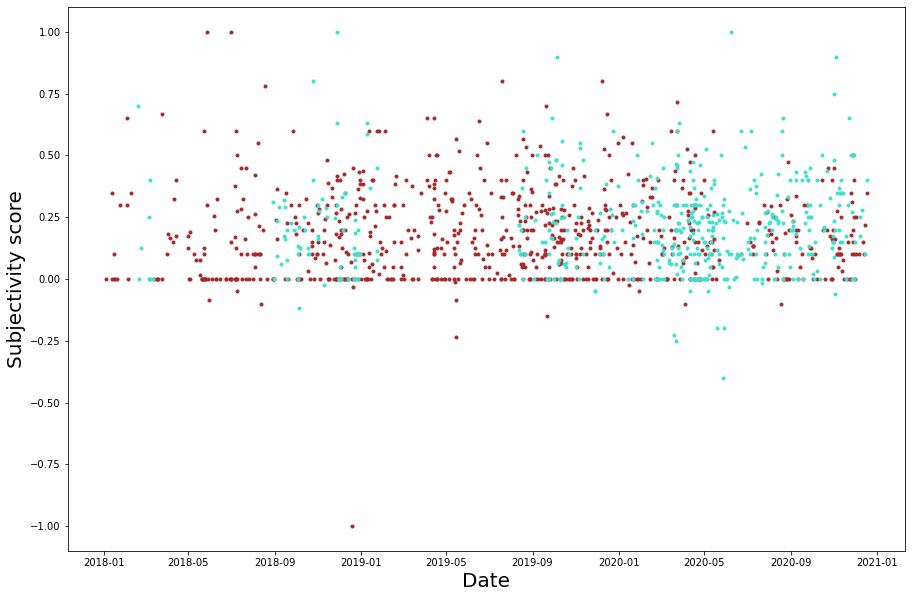

In [14]:
import matplotlib.pyplot as plt #for plotting

plt.figure(figsize=(15,10))
#plt.xlim(0,max(len(masra_tweets[0]),len(kebzabo_tweets[0])))

plt.plot(masra_sentiment['date_truncated'][masra_sentiment["subjectivity"]<2.5],masra_sentiment["subjectivity"][masra_sentiment["subjectivity"]<2.5],'.',color = mycolors[0],label='masra')
plt.plot(kebzabo_sentiment['date_truncated'][kebzabo_sentiment["subjectivity"]<2.5],kebzabo_sentiment["subjectivity"][kebzabo_sentiment["subjectivity"]<2.5],'.',color = mycolors[1],label='kebzabo')

#plt.stackplot(range(len(year)),participations, colors = mycolors, labels=name[african_participant])

#plt.yticks(np.arange(0,sum(np.max(participations,axis=1)),15),fontsize=15)
#plt.xticks(np.arange(1,len(year),3),year[np.arange(1,len(year),3)][::-1],fontsize=15)

#plt.legend(loc='upper left',fontsize=15)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Subjectivity score',fontsize=20)

In [15]:
# x-axis = number of words, y-axis = frequency/density 
# (example: Graph 2 and 3 at https://www.analyticsvidhya.com/blog/2020/11/fine-grained-sentiment-analysis-of-smartphone-review/)

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
masra_sentiment['nb words'] = [len(TextBlob(masra_tweets['tweet'][i]).words) for i in range(len(masra_tweets['tweet']))]
kebzabo_sentiment['nb words'] = [len(TextBlob(kebzabo_tweets['tweet'][i]).words) for i in range(len(kebzabo_tweets['tweet']))]

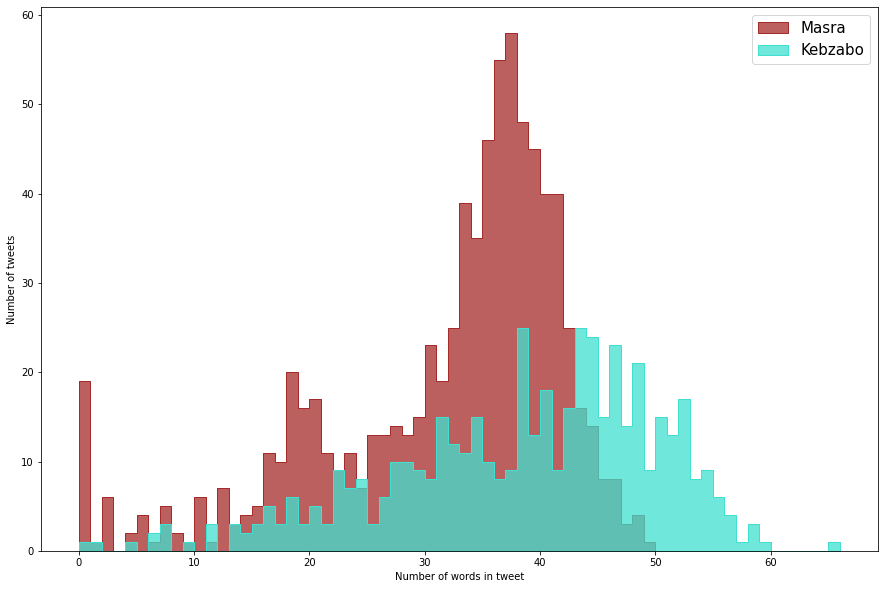

In [17]:
import seaborn as sns

plt.figure(figsize=(15,10))

sns.histplot(masra_sentiment['nb words'], color = mycolors[0], element="step",binwidth=1)
sns.histplot(kebzabo_sentiment['nb words'], color = mycolors[1], element="step",binwidth=1)

plt.legend(loc='upper right',fontsize=15,labels=['Masra','Kebzabo'])
plt.xlabel('Number of words in tweet')
plt.ylabel('Number of tweets')

plt.show()

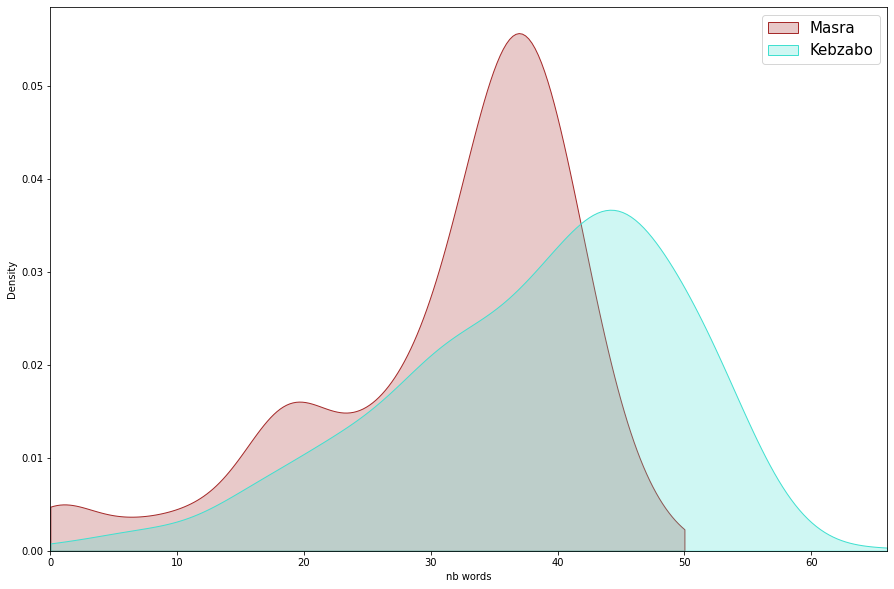

In [18]:
# Density plot

plt.figure(figsize=(15,10))

Xlim = (0,max(max(masra_sentiment['nb words']),max(kebzabo_sentiment['nb words'])))

sns.kdeplot(
   masra_sentiment['nb words'],cut=0,color=mycolors[0],
   fill=True, common_norm=False, palette="crest"
).set(xlim=Xlim)

sns.kdeplot(
   kebzabo_sentiment['nb words'],cut=0,color=mycolors[1],
   fill=True, common_norm=False, palette="crest"
).set(xlim=Xlim)

plt.legend(loc='upper right',fontsize=15,labels=['Masra','Kebzabo'])

plt.show()

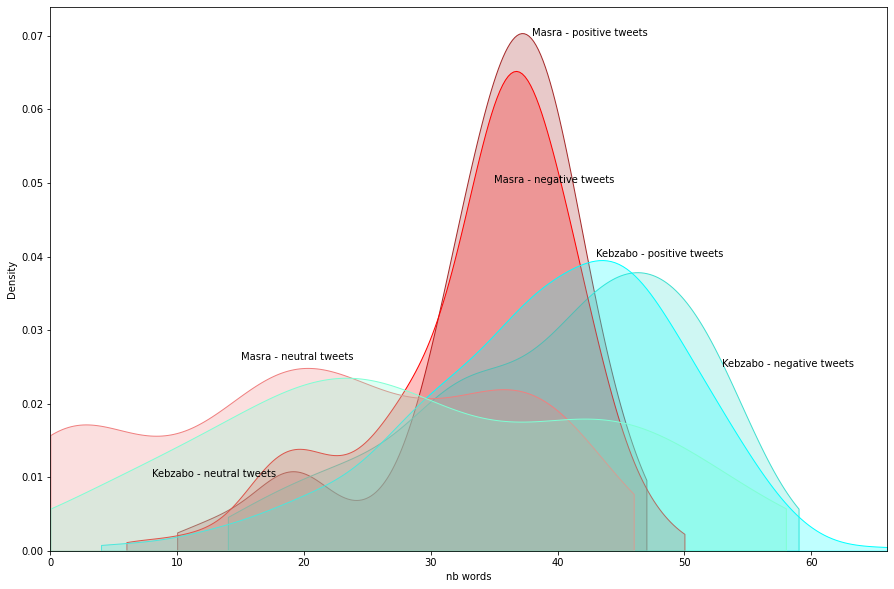

In [19]:
# Distribution of tweets according to their categories

plt.figure(figsize=(15,10))

Xlim = (0,max(max(masra_sentiment['nb words']),max(kebzabo_sentiment['nb words'])))

sns1 = sns.kdeplot(
   masra_sentiment['nb words'][masra_sentiment['polarity']<0],cut=0,color=mycolors[0],
   fill=True, common_norm=False, palette="crest"
)
sns1.set(xlim=Xlim)
sns1.text(35,0.05,'Masra - negative tweets')

sns2 = sns.kdeplot(
   kebzabo_sentiment['nb words'][kebzabo_sentiment['polarity']<0],cut=0,color=mycolors[1],
   fill=True, common_norm=False, palette="crest"
)
sns2.set(xlim=Xlim)
sns2.text(53,0.025,'Kebzabo - negative tweets')

#sns.fig.text(0.33, 1.02,'Above the plot', fontsize=20)

sns3 = sns.kdeplot(
   masra_sentiment['nb words'][masra_sentiment['polarity']>0],cut=0,color=mycolors[2],
   fill=True, common_norm=False, palette="crest"
)
sns3.set(xlim=Xlim)
sns3.text(38,0.07,'Masra - positive tweets')

sns4 = sns.kdeplot(
   kebzabo_sentiment['nb words'][kebzabo_sentiment['polarity']>0],cut=0,color=mycolors[3],
   fill=True, common_norm=False, palette="crest"
)
sns4.set(xlim=Xlim)
sns4.text(43,0.04,'Kebzabo - positive tweets')

sns5 = sns.kdeplot(
   masra_sentiment['nb words'][masra_sentiment['polarity']==0],cut=0,color=mycolors[4],
   fill=True, common_norm=False, palette="crest"
)
sns5.set(xlim=Xlim)
sns5.text(15,0.026,'Masra - neutral tweets')

sns6 = sns.kdeplot(
   kebzabo_sentiment['nb words'][kebzabo_sentiment['polarity']==0],cut=0,color=mycolors[5],
   fill=True, common_norm=False, palette="crest"
)
sns6.set(xlim=Xlim)
sns6.text(8,0.01,'Kebzabo - neutral tweets')

#plt.legend(loc='upper right',fontsize=15,labels=['Masra-positive','Kebzabo-positive','Masra-negative','Kebzabo-negative','Masra-neutral','Kebzabo-neutral'])

plt.show()

Sentiment analysis using bigrams

Word cloud

In [ ]:
# Help: https://www.datacamp.com/community/tutorials/wordcloud-python

Chi-square test on type of sentiment between tweets from Masra and Kebzabo

In [20]:
from scipy.stats import chisquare

In [43]:
masra_sentiment['polarity_cat'] = [float('nan') for y in range(len(masra_sentiment))]
masra_sentiment.loc[masra_sentiment['polarity']<0,'polarity_cat'] = 'negative'
masra_sentiment.loc[masra_sentiment['polarity']>0,'polarity_cat'] = 'positive'
masra_sentiment.loc[masra_sentiment['polarity']==0,'polarity_cat'] = 'neutral'

kebzabo_sentiment['polarity_cat'] = [float('nan') for y in range(len(kebzabo_sentiment))]
kebzabo_sentiment.loc[kebzabo_sentiment['polarity']<0,'polarity_cat'] = 'negative'
kebzabo_sentiment.loc[kebzabo_sentiment['polarity']>0,'polarity_cat'] = 'positive'
kebzabo_sentiment.loc[kebzabo_sentiment['polarity']==0,'polarity_cat'] = 'neutral'

In [58]:
chisquare(masra_sentiment['polarity_cat'].value_counts(),kebzabo_sentiment['polarity_cat'].value_counts())

Power_divergenceResult(statistic=266.88779274004685, pvalue=1.1118652646800203e-58)

#LDA